In [1]:
%load_ext autoreload
%autoreload 2

## Unsupervised Learning and Extraction of Blinking Patterns

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import espbm

### Data Loading

In [4]:
ear_data = pd.read_csv("data/sample_ear_short.csv")
display(ear_data.head())

ear_l = ear_data["EAR_l"].to_numpy()
ear_r = ear_data["EAR_r"].to_numpy()

,Frame,EAR_r,EAR_l
0,0,0.286274,0.269362
1,1,0.291212,0.268412
2,2,0.291212,0.269362
3,3,0.297798,0.270195
4,4,0.291479,0.269233


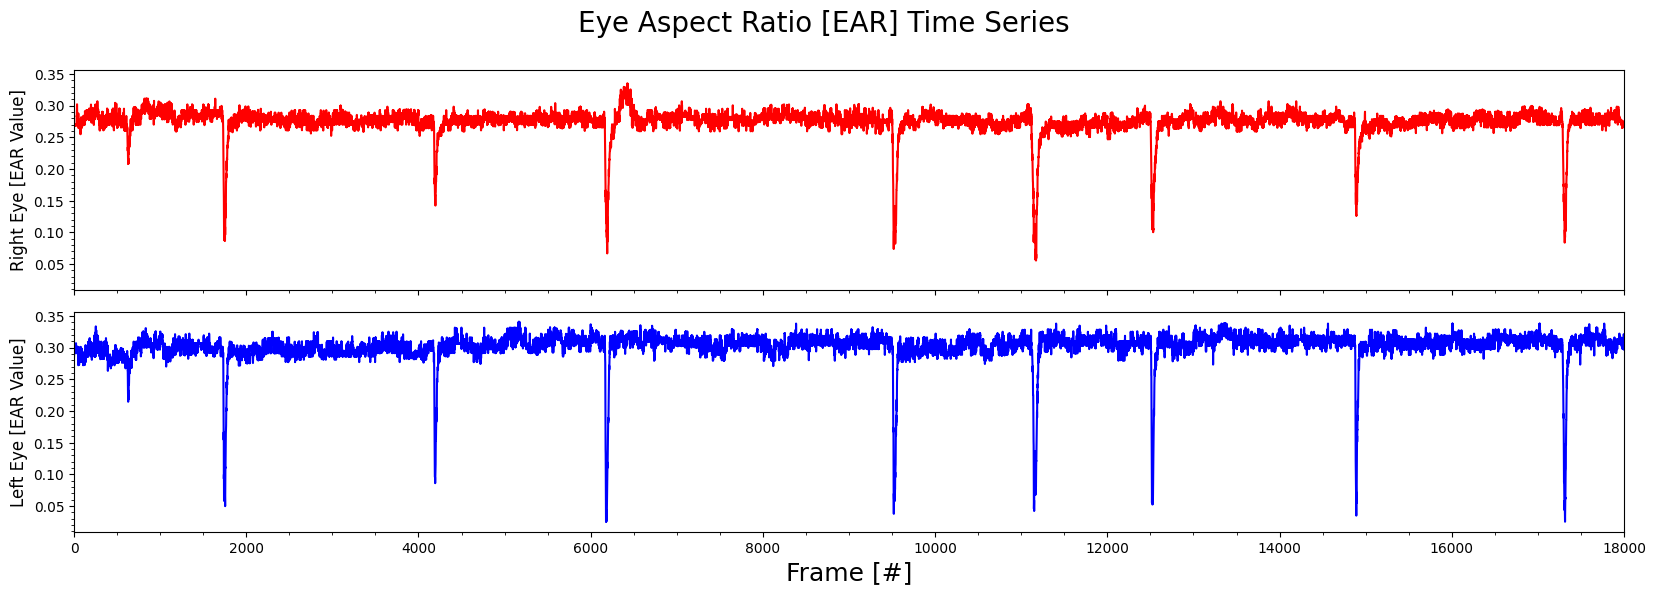

In [5]:
espbm.plot.ear_time_series(ear_l, ear_r)
plt.show()

----

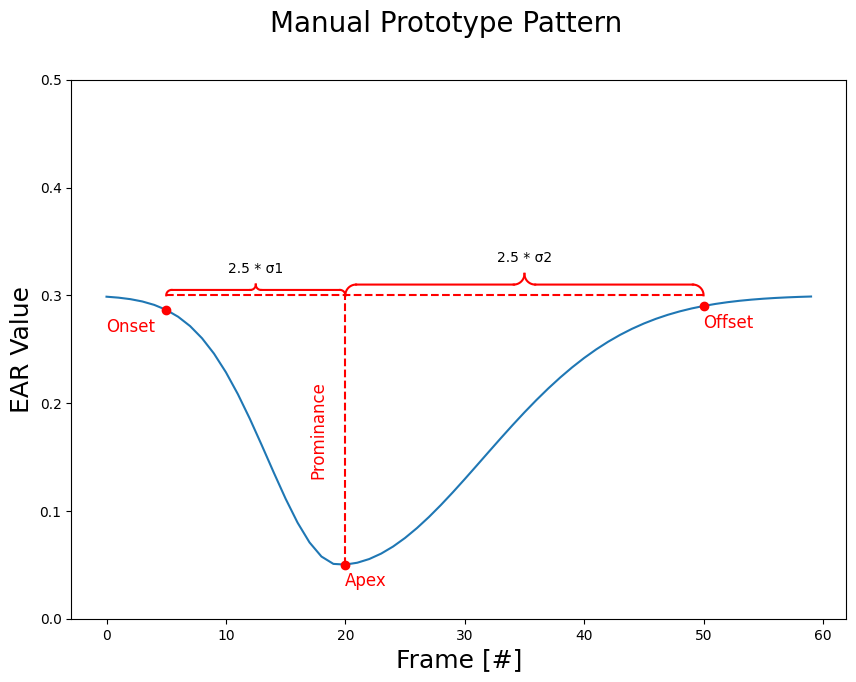

In [6]:
prototype, params = espbm.manual.define_prototype(return_params=True)
espbm.plot.manual_prototype(prototype=prototype, params=params)
plt.show()

In [ ]:
matches_l = espbm.match.find_prototype(ear_l, prototype, max_prototype_distance=3.0)
matches_r = espbm.match.find_prototype(ear_r, prototype, max_prototype_distance=3.0)

In [8]:
espbm.match.describe(matches_l)

Contains 12 matches
Matches: [[610, 670, 2.2084327024029764], [1728, 1788, 2.6248824325432505], [2966, 3026, 4.798554793317312], [4174, 4234, 2.064067348581413], [6167, 6227, 2.9187665896218715], [9507, 9567, 5.62805079569388], [10958, 11018, 4.82344896009459], [11146, 11206, 5.304413727418475], [11900, 11960, 5.651949760697324], [12505, 12565, 2.6068026834807605], [14871, 14931, 3.0157495000456773], [17291, 17351, 3.056692374082458]]


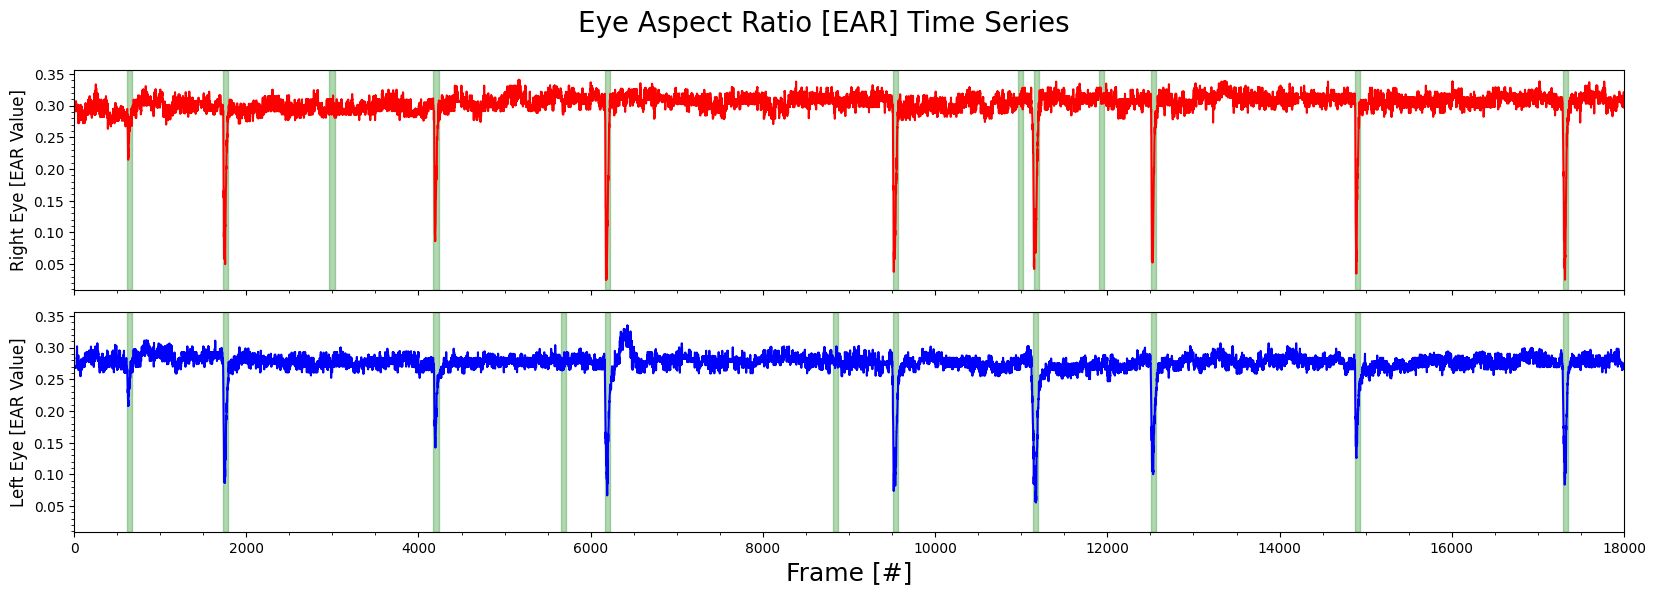

In [9]:
espbm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

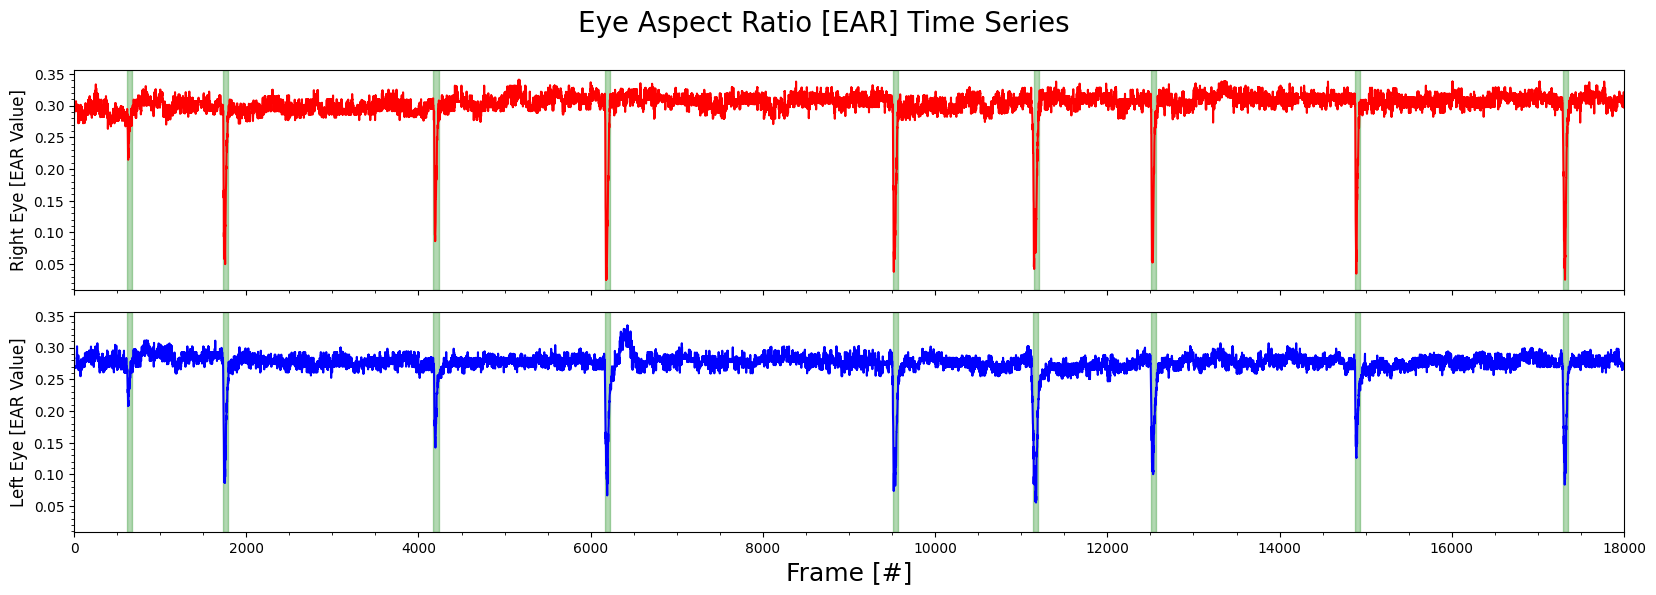

In [10]:
matches_l = espbm.match.find_prototype(ear_l, prototype)
matches_r = espbm.match.find_prototype(ear_r, prototype)
matches_l, matches_r = espbm.match.index_matching(matches_l, matches_r)
espbm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

### Interactive Demo

In [11]:
from ipywidgets import interact

In [ ]:
# interactive selection of prototype parameters
@interact(
    sig1=(1.0, 20.0, 1.0),
    sig2=(1.0, 20.0, 1.0),
    prominance=(0.0, 0.3, 0.01),
    apex_location=(0.0, 1.0, 0.05),
    window_size=(50, 200, 10),
    noise=[False, True],
)
def g(sig1, sig2, prominance, apex_location, window_size, noise):
    prototype, params = espbm.manual.define_prototype(
        sig1=sig1,
        sig2=sig2,
        baseline=0.3,
        prominance=prominance,
        apex_location=apex_location,
        window_size=window_size,
        noise=noise,
        return_params=True,
    )
    espbm.plot.manual_prototype(prototype=prototype, params=params, window_size=window_size)
    plt.show()

interactive(children=(FloatSlider(value=10.0, description='sig1', max=20.0, min=1.0, step=1.0), FloatSlider(va…